In [1]:
# import allÂ modules
import numpy as np
import PIL.Image as Image
import libtiff
import matplotlib
from matplotlib import pyplot as plt
import matplotlib
from skimage import io
from PRIS import * 
#import SingleObs
#from PRIS import PyPRIS
#from PRIS import L
import copy
import drawnow

%load_ext autoreload
%autoreload 2

In [2]:
%reload_ext autoreload

# Construct obseration operator

In [3]:
# construct observation operator.
 # load psf matrix
dpath = './test_data/psf.tif';
psf = io.imread(dpath)


# Load observation

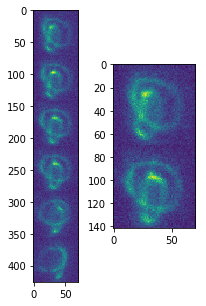

In [4]:
# load observation
data_path = './test_data';
f = 'obsStack.tif';
fov = io.imread(data_path + '/' + f)
fov.shape
plt.figure(figsize=(5,5));
plt.subplot(131)
plt.imshow(fov[[1,3,5,6,10,15],:,:].reshape(6*fov.shape[1],fov.shape[2]))
blur1 = fov[1,:,:];
blur2 = fov[5,:,:];

blur = np.concatenate([blur1, blur2]).reshape(2*71,71);
plt.subplot(132)
plt.imshow(blur)

# Decide candidates

In [5]:
# decide candidates 
range_ind0 = np.arange(-30,25)
range_ind1 = np.arange(12,62,2)
range_ind2 = np.arange(10,60,2)
candidate_locs = list()
for i0 in range_ind0:
    for i1 in range_ind1:
        for i2 in range_ind2:
            candidate_locs.append([i0,i1,i2])

# Construct sensing matrix

In [6]:
# construct sensing matrix
    # dependencies: candidates, observation operator.
    # yield: sensing matrix
    # method: loop over all candidates and record the corresponding observations.
a = SingleObs()
a.psf = np.copy(psf)
a.psfz0 = 106
a.debug = False
a.imsize = blur1.shape
a.edge_padding = True
A = np.ndarray([blur.shape[0]*blur.shape[1], len(candidate_locs)+1])
A.shape
for count, loc in enumerate(candidate_locs):
#for count, loc in enumerate([[0,10,10],[10,10,10]]):
    
    loc1 = np.copy(loc); loc1[0] = np.copy(loc[0])-8
    loc2 = np.copy(loc); loc2[0] = np.copy(loc[0])+8
    a.location = loc1
    a.single_obs()
    a1 = a.obs.ravel()
    
    a.location = loc2
    a.single_obs()
    a2 = a.obs.ravel()
    
    A[:,count] = np.concatenate([a1.ravel(),a2.ravel()]).ravel()
A[:,len(candidate_locs)] = 1

# Recovery

In [10]:
%reload_ext autoreload
# recover
    # input sensint matrix, and observation; 
    # yield: recovered vector
    # use scikit learn lasso solver
import time
A[:,len(candidate_locs)] = 600
Anorm = A/500
a = LinBreg(Anorm,np.zeros(A.shape[1]),blur.ravel())
a.debug = True
a.deep_debug = False
a.mu = 10000000000
a.obs_dim0 = blur.shape[0]
a.obs_dim1 = blur.shape[1]

#a.stepsize = 1e-6
a.alpha = 1e-7
a.maxit = 100 # maximum iteration steps.
a.debug_it_int = 20
a.it_check_rem = 1
a.kicking_ints = 2
a.kicking = True
a.range_ind0 = range_ind0
a.range_ind1 = range_ind1
a.range_ind2 = range_ind2

a.getready()
a.go()

Creation of the directory ../../PyPRIS_Scratch/debug_output failed


G:\DH_localization\PyPRIS\PyPRIS_notebooks\PRIS.py:406: RuntimeWarning: divide by zero encountered in double_scalars
  self.iterations.append(it_count)
G:\DH_localization\PyPRIS\PyPRIS_notebooks\PRIS.py:376: RuntimeWarning: divide by zero encountered in log
  plt.plot(self.iterations, np.log(self.hist_res), '.')


intermediate output it#1
intermediate output it#21
intermediate output it#41
intermediate output it#61
intermediate output it#81
intermediate output it#101


In [9]:
len(a.hist_kicking_eval_counts)

0

In [ ]:
a.hist_kicking_eval_counts
plt.scatter(a.hist_kicking_eval_counts[0],a.hist_kicking_eval_counts[1])

In [ ]:
l=a.hist_kicking_eval_counts

In [ ]:
z = list(zip(*l))
x = list(z[0])
y = list(z[1])


In [ ]:
plt.scatter(x[np.where(y == True)],y[np.where(y == True)], c = z[1])